In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)






data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [3]:
# label_encoder = LabelEncoder()
# data_train['label'] = label_encoder.fit_transform(data_train['label'])
# data_test['label']=label_encoder.transform(data_test['label'])
# data_val['label']=label_encoder.transform(data_val['label'])





In [4]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,real,-299.236816,52.662586,-24.403175,-11.840667,-31.829384,-43.328857,-30.069048,-11.122869,-8.959422,...,4.421267,4.183464,3.025446,2.497782,1.306463,-1.058971,-3.065428,-4.014872,-4.763466,-3.404777
1,fake,-343.804657,52.359821,-22.957390,-20.645117,-29.765867,-43.897350,-23.515631,-6.758003,-14.084697,...,4.445438,4.089088,3.120970,2.451672,0.875255,-0.793705,-3.254990,-4.153214,-4.414269,-2.936457
2,fake,-312.695892,23.907454,-17.869902,-14.646072,-38.429413,-31.381046,-28.978678,-13.500593,-11.902526,...,4.606266,4.374418,3.419720,2.431282,0.965190,-1.193147,-3.385185,-4.279051,-4.447268,-2.950305
3,fake,-327.325378,26.492430,-30.117859,-15.566369,-32.635006,-25.533854,-19.528330,-0.190295,-14.485140,...,3.945306,3.789051,2.988493,2.335446,0.976127,-0.879155,-3.072417,-3.987565,-4.129115,-2.812579
4,fake,-291.521606,39.392548,-32.242016,-5.661716,-30.316301,-44.411400,-25.223606,-15.492560,-15.313764,...,4.875808,4.369923,3.373211,2.560222,0.827044,-1.362125,-3.792991,-4.298060,-4.372222,-2.840312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-298.789154,31.628613,-21.434998,-15.300174,-31.951029,-28.865301,-35.109188,-15.379094,-13.320565,...,4.600567,4.325418,3.432295,2.200716,0.862238,-1.051747,-3.221380,-4.112402,-4.507841,-3.019476
117889,fake,-300.511047,47.978924,-17.142303,0.035919,-31.386740,-43.323093,-21.078444,-19.467838,-18.151133,...,4.797927,4.484085,3.359540,2.124950,0.558312,-1.172684,-3.142383,-4.138029,-4.167678,-2.787655
117890,fake,-331.597748,60.500210,-11.504491,-15.679890,-41.204899,-30.462835,-27.965597,-21.826513,-19.897730,...,5.259519,4.681046,3.561475,2.313710,0.700400,-1.551776,-3.723605,-4.658264,-4.736686,-2.802612
117891,fake,-334.519958,46.404533,-26.374607,-13.996825,-29.764326,-34.780598,-22.215347,-9.921897,-15.460548,...,4.596193,4.390740,2.977537,2.379635,0.265723,-1.205245,-3.193300,-4.238250,-4.034648,-2.816015


In [5]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [6]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [7]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1843/1843 [==============================] - 18s 9ms/step - loss: 0.2948 - accuracy: 0.9106 - val_loss: 0.2897 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 16s 8ms/step - loss: 0.2896 - accuracy: 0.9111 - val_loss: 0.2872 - val_accuracy: 0.9111
Epoch 3/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2867 - accuracy: 0.9111 - val_loss: 0.2823 - val_accuracy: 0.9111
Epoch 4/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2824 - accuracy: 0.9111 - val_loss: 0.2782 - val_accuracy: 0.9111
Epoch 5/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2628 - accuracy: 0.9130 - val_loss: 0.2539 - val_accuracy: 0.9147
Epoch 6/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2364 - accuracy: 0.9189 - val_loss: 0.2285 - val_accuracy: 0.9205
Epoch 7/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2192 - accuracy: 0.9244 - val_loss: 0.2161 -

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.0547 - accuracy: 0.9847 - 2s/epoch - 4ms/step
Test Accuracy: 98.47%


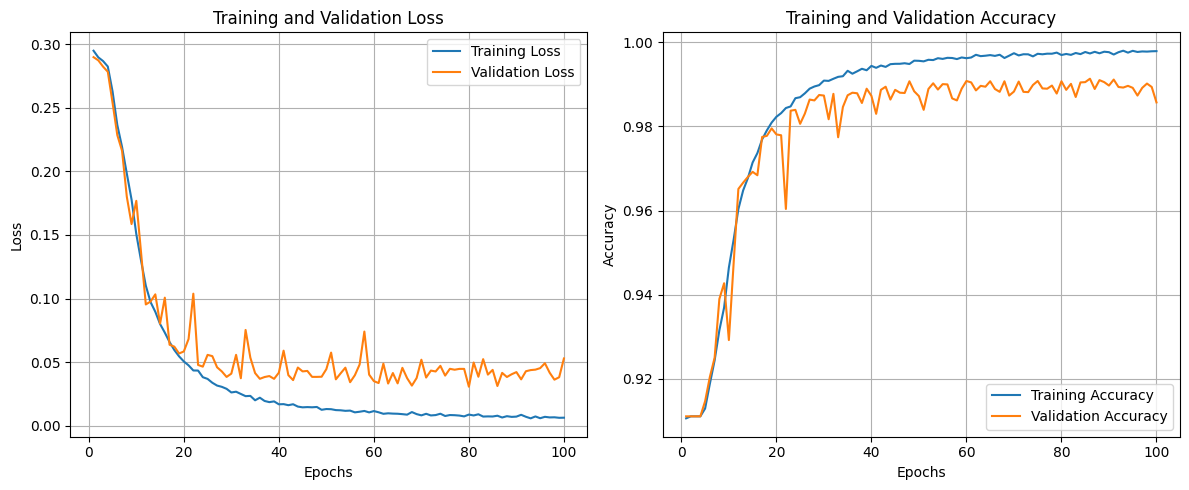

In [9]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 2s 3ms/step
Test f1_score : 91.80%


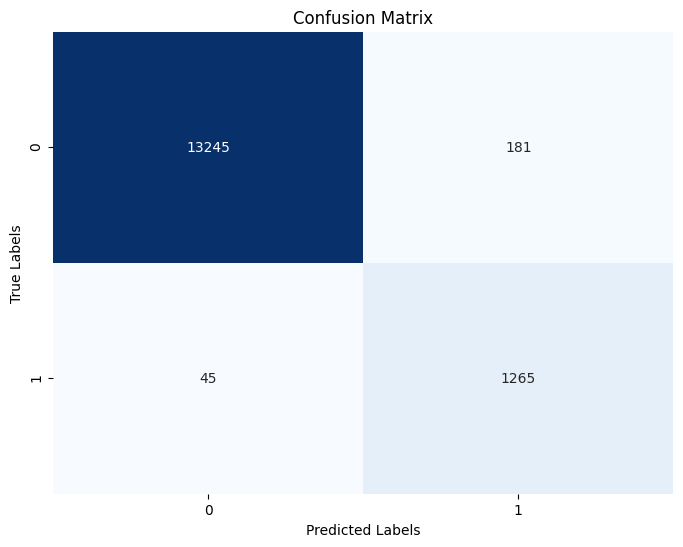

In [10]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test),axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test),axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,0,1
14732,0,1
14733,1,0
14734,1,0


# eraly stopping

In [13]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])



Epoch 1/100
1843/1843 [==============================] - 18s 9ms/step - loss: 0.2962 - accuracy: 0.9111 - val_loss: 0.2915 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2904 - accuracy: 0.9111 - val_loss: 0.2890 - val_accuracy: 0.9111
Epoch 3/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2877 - accuracy: 0.9111 - val_loss: 0.2852 - val_accuracy: 0.9111
Epoch 4/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2786 - accuracy: 0.9114 - val_loss: 0.2480 - val_accuracy: 0.9170
Epoch 5/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2438 - accuracy: 0.9181 - val_loss: 0.2315 - val_accuracy: 0.9199
Epoch 6/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2292 - accuracy: 0.9223 - val_loss: 0.2152 - val_accuracy: 0.9258
Epoch 7/100
1843/1843 [==============================] - 16s 9ms/step - loss: 0.2163 - accuracy: 0.9258 - val_loss: 0.2144 -

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.0378 - accuracy: 0.9908 - 2s/epoch - 4ms/step
Test Accuracy: 99.08%


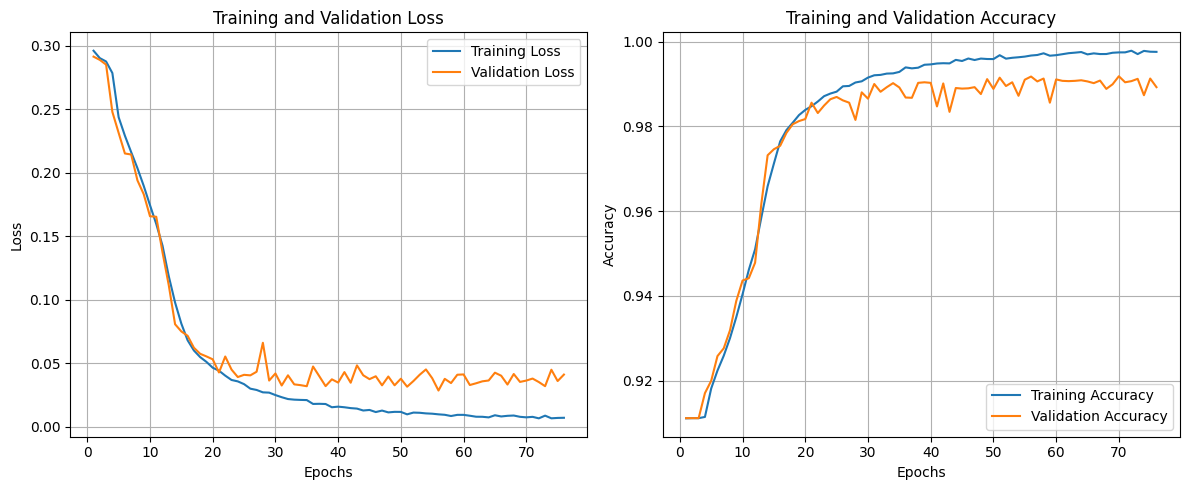

In [15]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




461/461 [==============================] - 2s 3ms/step
Test f1_score : 94.65%


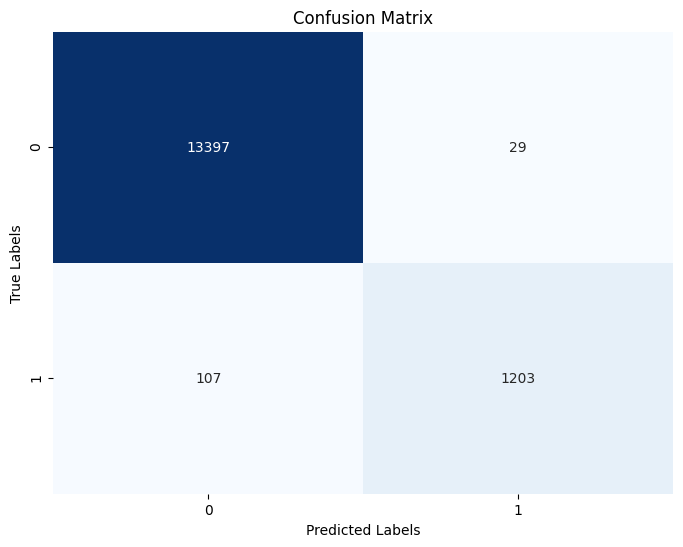

In [16]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
